# Boom Bikes : Understanding demands of bikes

* Problem Statement: We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

#### Importing the libraries

In [2]:
import pandas as pd 
import numpy as np  
from sklearn import linear_model
import seaborn as sns 
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#### Reading the csv file


In [3]:
day_copy = pd.read_csv("/Users/mrbinit/Downloads/day_copy.csv")

## Data Understanding

In [4]:
day_copy.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


The describe() method provides summary statistics such as count, mean, standard deviation, minimum, maximum, and quartile values for each numerical column in the DataFrame.

In [5]:
day_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


The info() method provides a summary of the dataframe, including the number of rows, number of columns, column names, data types of each column, and the amount of memory used by the dataframe

In [6]:
day_copy.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [7]:
day_copy.shape


(730, 16)

This code returns the shape of the day_copy dataframe, which is a tuple representing the dimensions of the dataframe. The shape is given as (number_of_rows, number_of_columns). It provides information about the size of the dataframe, specifically the number of rows and columns it contains.






#### Dropping the unnecessary variables 

In [8]:
day_copy.drop(['instant', 'casual', 'dteday', 'atemp','registered'], axis=1, inplace=True)

"instant": This column represents the record index and does not provide any meaningful information for modeling bike demand. It can be dropped as it does not contribute to understanding or predicting the demand.

"dteday": This column represents the date, which is already captured by the "yr" and "mnth" columns. Since the year and month are already available, the specific date may not provide significant additional information for the model. It can be dropped unless you plan to perform time series analysis or extract specific temporal patterns.

"casual" and "registered": These columns represent the counts of casual users and registered users separately. Since the target variable "cnt" already represents the total count of rental bikes, including both casual and registered users, these columns are redundant and can be dropped.



 The drop() function is used to remove columns (or rows) from a dataframe.
['instant', 'temp', 'casual'] is a list of column names to be dropped.
axis=1 specifies that the operation should be performed along the columns (as opposed to rows).
inplace=True ensures that the modification is made directly to the day_copy dataframe, without creating a new dataframe.


In [9]:
day_copy.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600
5,1,0,1,0,4,1,1,8.378268,51.8261,6.000868,1606
6,1,0,1,0,5,1,2,8.057402,49.8696,11.304642,1510
7,1,0,1,0,6,0,2,6.765000,53.5833,17.875868,959
8,1,0,1,0,0,0,1,5.671653,43.4167,24.250650,822
9,1,0,1,0,1,1,1,6.184153,48.2917,14.958889,1321


Convert date column to datetime

In [10]:
day_copy.weekday.value_counts()

weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64

this is done to convert the weekday column from numbers to corresponding weekday names

In [11]:
#calculates the number of missing values in a DataFrame called day_copy and stores the result in the variable missing_value.
missing_value = day_copy.isnull().sum()
print(missing_value)


season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
hum           0
windspeed     0
cnt           0
dtype: int64


this shows that we dont have any missing value which makes the data preparation set more easier.

In [12]:
day_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


## Data Visualisation 

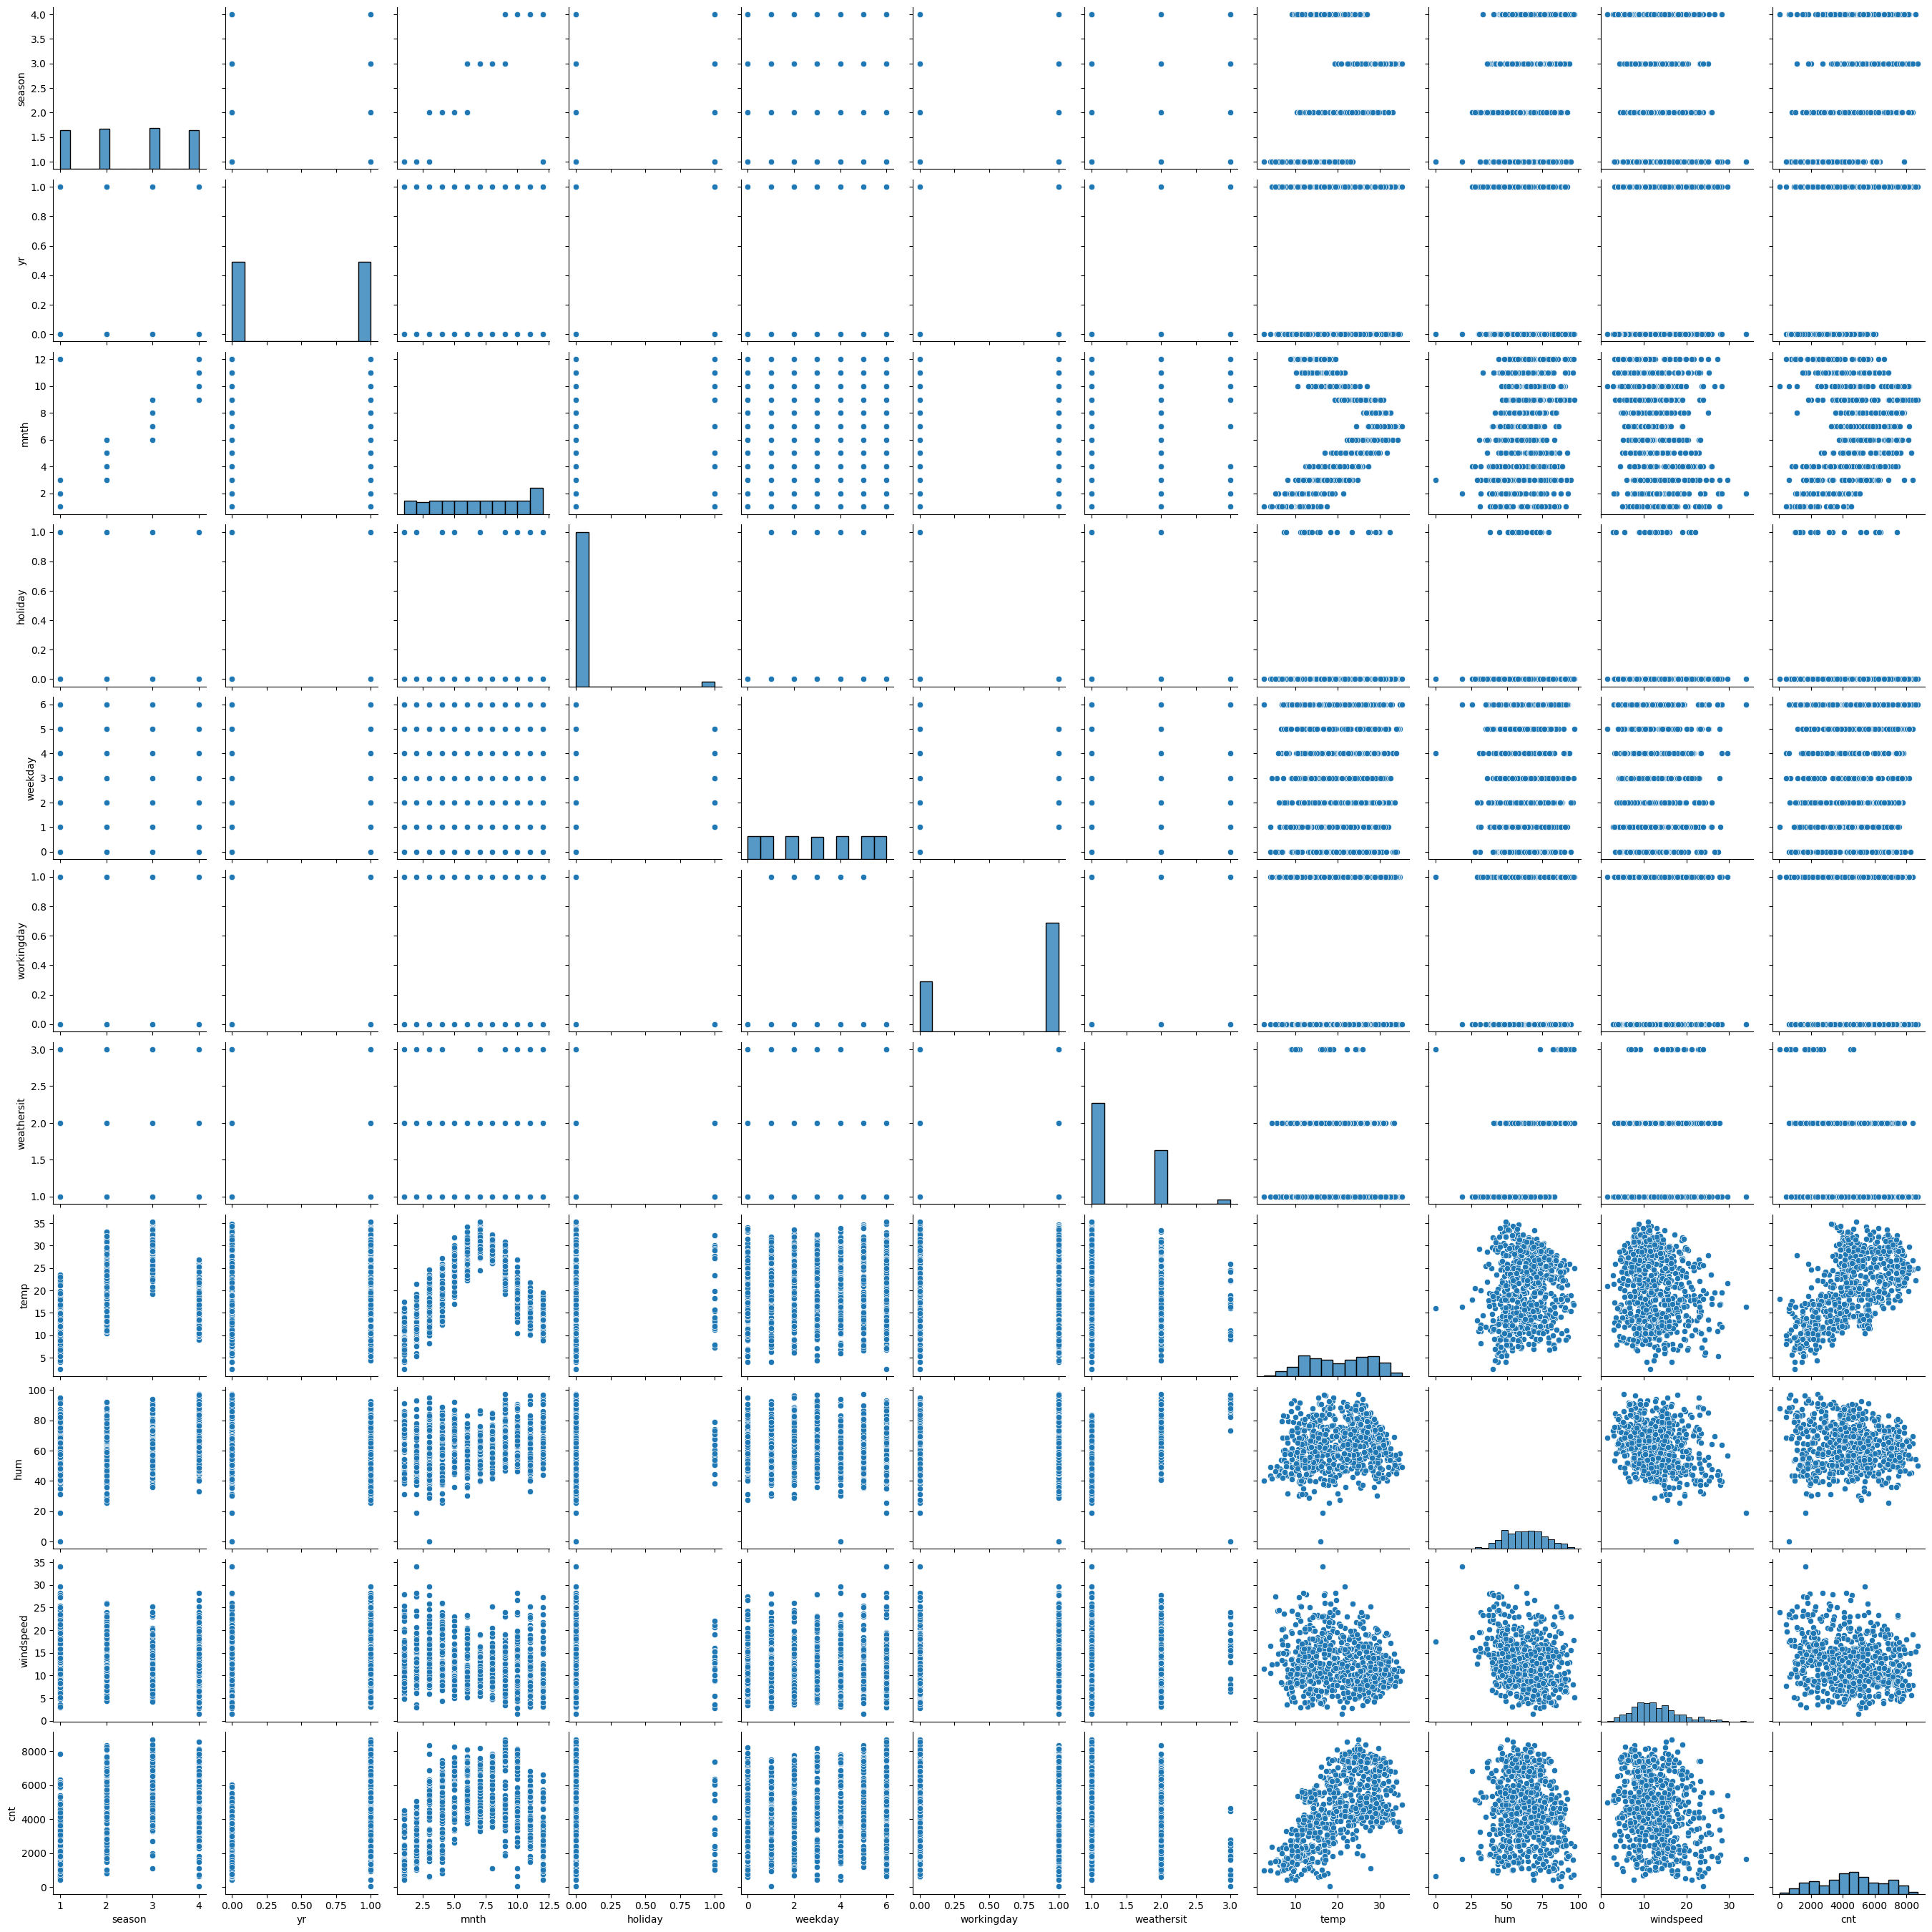

In [13]:
#This code snippet is using the Seaborn library to create a pairplot, which is a grid of scatterplots and histograms.

sns.pairplot(day_copy)
plt.show()

In [14]:
day_copy.season.value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [15]:
day_copy.weathersit.value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [16]:
day_copy.mnth.value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

In [17]:
day_copy.yr.value_counts()

yr
0    365
1    365
Name: count, dtype: int64

creating a heatmap to find correlation between different variable

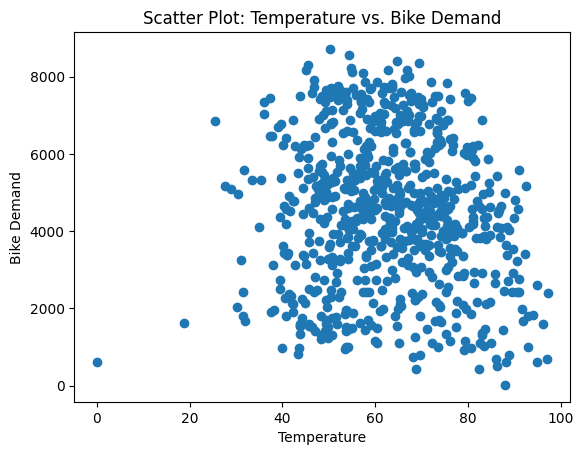

In [18]:

plt.scatter(day_copy['hum'], day_copy['cnt'])

# Set labels and title
plt.xlabel('Temperature')
plt.ylabel('Bike Demand')
plt.title('Scatter Plot: Temperature vs. Bike Demand')

# Display the plot
plt.show()


In [19]:
day_copy.shape


(730, 11)

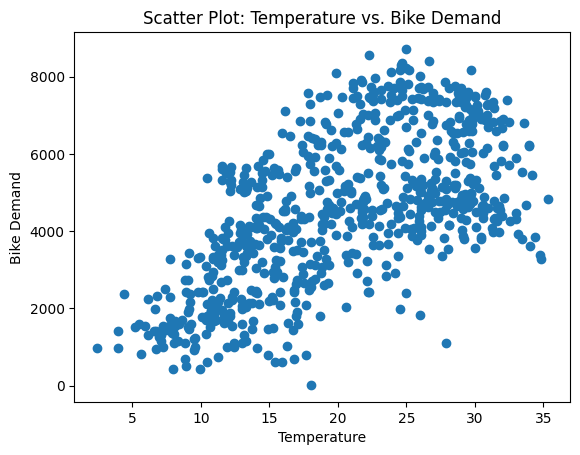

In [20]:

plt.scatter(day_copy['temp'], day_copy['cnt'])

# Set labels and title
plt.xlabel('Temperature')
plt.ylabel('Bike Demand')
plt.title('Scatter Plot: Temperature vs. Bike Demand')

# Display the plot
plt.show()


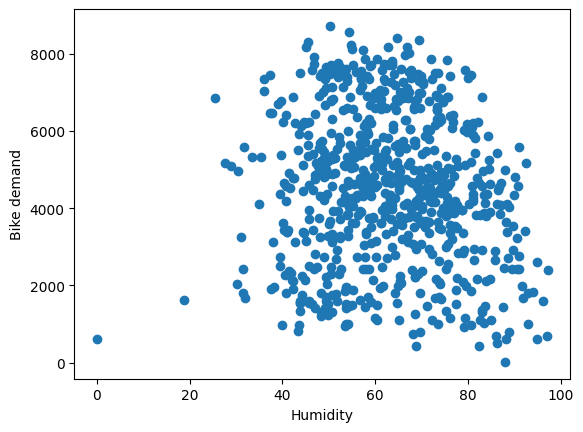

In [21]:
plt.scatter(day_copy['hum'], day_copy['cnt'])
plt.xlabel('Humidity')
plt.ylabel('Bike demand')
plt.show()

here we can there is a outlier

In [22]:
coorelation_matrix = day_copy.corr()
coorelation_matrix


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.128565,-0.158186,0.627044
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,1.000000,-0.248506,-0.098543
windspeed,-2.296069e-01,-1.162435e-02,-2.080131e-01,0.006257,0.014283,-0.018666,0.039769,-0.158186,-0.248506,1.000000,-0.235132


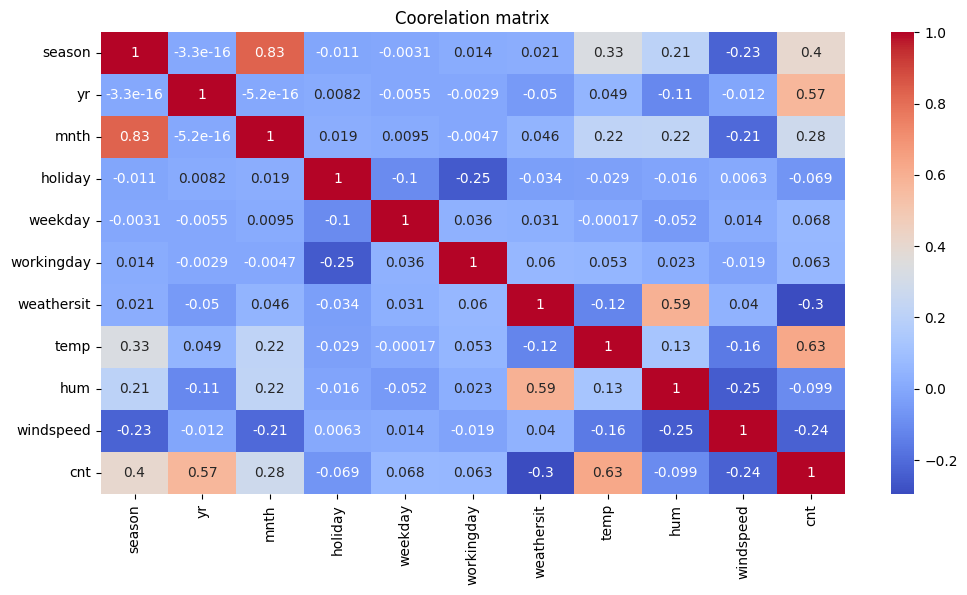

In [23]:
plt.figure(figsize = (12, 6))
sns.heatmap(coorelation_matrix, cmap= 'coolwarm', annot= True)
plt.title('Coorelation matrix')
plt.show()


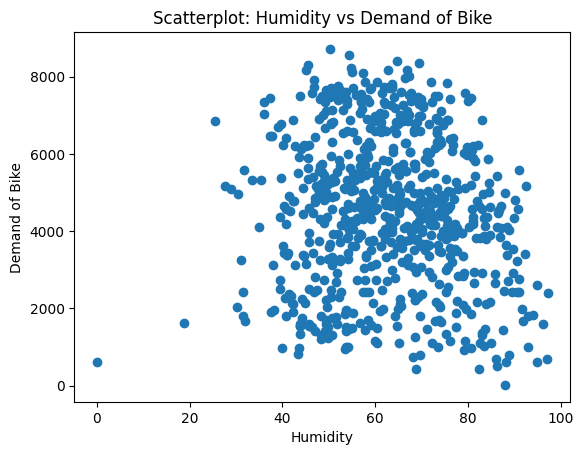

In [24]:
plt.scatter(day_copy['hum'], day_copy['cnt'])
plt.xlabel("Humidity")
plt.ylabel('Demand of Bike')
plt.title("Scatterplot: Humidity vs Demand of Bike")
plt.show()


In [25]:
day_copy.mnth

0       1
1       1
2       1
3       1
4       1
       ..
725    12
726    12
727    12
728    12
729    12
Name: mnth, Length: 730, dtype: int64

In [26]:
day_copy

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,48.3333,23.500518,1796


### Data preparation


our categorical variables are 'season','yr','mnth','holiday','weekday','workingday'and 'weathersit'

### Creating specifc labels for categorical variables based on data dictionary

In [27]:
def seasonname (x):
    if x == 1 : 
        return 'spring'
    elif x ==2:
        return 'summer'
    elif x == 3:
        return 'fall'
    else:
        return 'winter'

In [28]:
day_copy['season'] = day_copy['season'].apply(seasonname)
#day_copy = day_copy.drop('season', axis = 1)
day_copy



,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,12,0,4,1,2,10.420847,65.2917,23.458911,2114
726,spring,1,12,0,5,1,2,10.386653,59.0000,10.416557,3095
727,spring,1,12,0,6,0,2,10.386653,75.2917,8.333661,1341
728,spring,1,12,0,0,0,1,10.489153,48.3333,23.500518,1796


In [29]:
def year (x):
    if x == 0 : 
        return '2018'
    else:
        return '2019'
day_copy['yr'] = day_copy['yr'].apply(year)
# day_copy = day_copy.drop('yr', axis = 1)
day_copy

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,spring,2018,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,spring,2018,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,spring,2018,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,spring,2018,1,0,3,1,1,9.305237,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,spring,2019,12,0,4,1,2,10.420847,65.2917,23.458911,2114
726,spring,2019,12,0,5,1,2,10.386653,59.0000,10.416557,3095
727,spring,2019,12,0,6,0,2,10.386653,75.2917,8.333661,1341
728,spring,2019,12,0,0,0,1,10.489153,48.3333,23.500518,1796


In [30]:
def weekday (x):
    if x == 1:
        return 'Mon'
    elif x == 2:
        return 'Tue'
    elif x == 3:
        return 'Wed'
    elif x == 4:
        return 'Thurs'
    elif x == 5:
        return 'Fri'
    elif x == 6:
        return 'Sat'
    else:
        return 'Sun'
day_copy['weekday'] = day_copy['weekday'].apply(weekday)
# day_copy = day_copy.drop('weekday', axis = 1)
day_copy

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,1,0,Sat,0,2,14.110847,80.5833,10.749882,985
1,spring,2018,1,0,Sun,0,2,14.902598,69.6087,16.652113,801
2,spring,2018,1,0,Mon,1,1,8.050924,43.7273,16.636703,1349
3,spring,2018,1,0,Tue,1,1,8.200000,59.0435,10.739832,1562
4,spring,2018,1,0,Wed,1,1,9.305237,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,spring,2019,12,0,Thurs,1,2,10.420847,65.2917,23.458911,2114
726,spring,2019,12,0,Fri,1,2,10.386653,59.0000,10.416557,3095
727,spring,2019,12,0,Sat,0,2,10.386653,75.2917,8.333661,1341
728,spring,2019,12,0,Sun,0,1,10.489153,48.3333,23.500518,1796


In [31]:
def workingday (x):
    if x == 1:
        return 'working_yes'
    else:
        return 'working_no'
day_copy['workingday'] = day_copy['workingday'].apply(workingday)
# day_copy = day_copy.drop('workingday', axis = 1)
day_copy

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,1,0,Sat,working_no,2,14.110847,80.5833,10.749882,985
1,spring,2018,1,0,Sun,working_no,2,14.902598,69.6087,16.652113,801
2,spring,2018,1,0,Mon,working_yes,1,8.050924,43.7273,16.636703,1349
3,spring,2018,1,0,Tue,working_yes,1,8.200000,59.0435,10.739832,1562
4,spring,2018,1,0,Wed,working_yes,1,9.305237,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,spring,2019,12,0,Thurs,working_yes,2,10.420847,65.2917,23.458911,2114
726,spring,2019,12,0,Fri,working_yes,2,10.386653,59.0000,10.416557,3095
727,spring,2019,12,0,Sat,working_no,2,10.386653,75.2917,8.333661,1341
728,spring,2019,12,0,Sun,working_no,1,10.489153,48.3333,23.500518,1796


In [32]:
def weathersit (x):
    if x == 1 : 
        return 'Clear'
    elif x == 2:
        return 'blurry'
    elif x ==3:
        return 'Snow'
    else:
        return 'Rainy'
day_copy['weathersit'] = day_copy['weathersit'].apply(weathersit)
# day_copy = day_copy.drop('weathersit', axis = 1)
day_copy

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,1,0,Sat,working_no,blurry,14.110847,80.5833,10.749882,985
1,spring,2018,1,0,Sun,working_no,blurry,14.902598,69.6087,16.652113,801
2,spring,2018,1,0,Mon,working_yes,Clear,8.050924,43.7273,16.636703,1349
3,spring,2018,1,0,Tue,working_yes,Clear,8.200000,59.0435,10.739832,1562
4,spring,2018,1,0,Wed,working_yes,Clear,9.305237,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,spring,2019,12,0,Thurs,working_yes,blurry,10.420847,65.2917,23.458911,2114
726,spring,2019,12,0,Fri,working_yes,blurry,10.386653,59.0000,10.416557,3095
727,spring,2019,12,0,Sat,working_no,blurry,10.386653,75.2917,8.333661,1341
728,spring,2019,12,0,Sun,working_no,Clear,10.489153,48.3333,23.500518,1796


In [33]:
def month_name(x):
    if x == 1:
        return 'Jan'
    elif x == 2:
        return 'Feb'
    elif x == 3:
        return 'Mar'
    elif x == 4:
        return 'Apr'
    elif x == 5:
        return 'May'
    elif x == 6:
        return 'Jun'
    elif x == 7:
        return 'Jul'
    elif x == 8:
        return 'Aug'
    elif x == 9:
        return 'Sep'
    elif x == 10:
        return 'Oct'
    elif x == 11:
        return 'Nov'
    elif x == 12:
        return 'Dec'

day_copy['mnth'] = day_copy['mnth'].apply(month_name)
# day_copy = day_copy.drop('mnth', axis =1 )
day_copy

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,Jan,0,Sat,working_no,blurry,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,0,Sun,working_no,blurry,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,0,Mon,working_yes,Clear,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,0,Tue,working_yes,Clear,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,0,Wed,working_yes,Clear,9.305237,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,spring,2019,Dec,0,Thurs,working_yes,blurry,10.420847,65.2917,23.458911,2114
726,spring,2019,Dec,0,Fri,working_yes,blurry,10.386653,59.0000,10.416557,3095
727,spring,2019,Dec,0,Sat,working_no,blurry,10.386653,75.2917,8.333661,1341
728,spring,2019,Dec,0,Sun,working_no,Clear,10.489153,48.3333,23.500518,1796


In [34]:
def holiday (x):
    if x == 0:
        return 'Holiday'
    else:
        return 'No-Holiday'
day_copy['holiday'] = day_copy['holiday'].apply(holiday)
# day_copy = day_copy.drop('holiday', axis =1 )
day_copy

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,Jan,Holiday,Sat,working_no,blurry,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,Holiday,Sun,working_no,blurry,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,Holiday,Mon,working_yes,Clear,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,Holiday,Tue,working_yes,Clear,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,Holiday,Wed,working_yes,Clear,9.305237,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,spring,2019,Dec,Holiday,Thurs,working_yes,blurry,10.420847,65.2917,23.458911,2114
726,spring,2019,Dec,Holiday,Fri,working_yes,blurry,10.386653,59.0000,10.416557,3095
727,spring,2019,Dec,Holiday,Sat,working_no,blurry,10.386653,75.2917,8.333661,1341
728,spring,2019,Dec,Holiday,Sun,working_no,Clear,10.489153,48.3333,23.500518,1796


### Creating dummy variables for all the categorical variables 

### variable one: month

In [35]:
#creating a dummy variable
month_dummy = pd.get_dummies(day_copy.mnth,drop_first = True)
month_dummy = month_dummy.astype(int)
month_dummy.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


 Month is represented by numerical values (1 to 12). However, month does not have an inherent order like the seasons or years. In this case, it is common to create dummy variables for each month to capture any potential seasonality or monthly patterns

### weekday dummy variable

In [36]:
weekdays_dummy = pd.get_dummies(day_copy.weekday, drop_first = True)
weekdays_dummy = weekdays_dummy.astype(int)
weekdays_dummy

,Mon,Sat,Sun,Thurs,Tue,Wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
725,0,0,0,1,0,0
726,0,0,0,0,0,0
727,0,1,0,0,0,0
728,0,0,1,0,0,0


### HOLIDAYS DUMMY VARIABLE  

In [37]:
holidays_dummy = pd.get_dummies(day_copy.holiday, drop_first=True)
holidays_dummy = holidays_dummy.astype(int)
holidays_dummy.head()


,No-Holiday
0,0
1,0
2,0
3,0
4,0


### workingday dummy variable

In [38]:
workingdays_dummy = pd.get_dummies(day_copy.workingday,drop_first = True)
workingdays_dummy = workingdays_dummy.astype(int)
workingdays_dummy.head()

,working_yes
0,0
1,0
2,1
3,1
4,1


### season dummy variable

In [39]:
#creating a dummy variable
seasons_dummy = pd.get_dummies(day_copy.season, drop_first= True)
seasons_dummy = seasons_dummy.astype(int)
seasons_dummy

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


### weathersit dummy variable

In [40]:
weathersit_dummy = pd.get_dummies(day_copy.weathersit, drop_first = True)
weathersit_dummy = weathersit_dummy.astype(int)
weathersit_dummy

,Snow,blurry
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
725,0,1
726,0,1
727,0,1
728,0,0


### year dummy variable

In [41]:
year_dummy = pd.get_dummies(day_copy.yr,drop_first = True)
year_dummy = year_dummy.astype(int)
year_dummy.head()

,2019
0,0
1,0
2,0
3,0
4,0


### weathersit dummy variable

In [42]:
weather_dummy = pd.get_dummies(day_copy.weathersit,drop_first = True)
weather_dummy = weather_dummy.astype(int)
weather_dummy.head()

,Snow,blurry
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


### merge all the variable

In [43]:
data = pd.concat([day_copy, seasons_dummy,year_dummy, month_dummy, holidays_dummy , weekdays_dummy,weather_dummy,workingdays_dummy,],axis =1)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,No-Holiday,Mon,Sat,Sun,Thurs,Tue,Wed,Snow,blurry,working_yes
0,spring,2018,Jan,Holiday,Sat,working_no,blurry,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,1,0
1,spring,2018,Jan,Holiday,Sun,working_no,blurry,14.902598,69.6087,16.652113,...,0,0,0,1,0,0,0,0,1,0
2,spring,2018,Jan,Holiday,Mon,working_yes,Clear,8.050924,43.7273,16.636703,...,0,1,0,0,0,0,0,0,0,1
3,spring,2018,Jan,Holiday,Tue,working_yes,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,1,0,0,0,1
4,spring,2018,Jan,Holiday,Wed,working_yes,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,1,0,0,1


In [44]:
#dropping the categorical variable
data.drop(['weathersit', 'yr', 'mnth', 'holiday', 'weekday', 'season', 'workingday'], axis = 1, inplace = True)

In [45]:
data

,temp,hum,windspeed,cnt,spring,summer,winter,2019,Aug,Dec,...,No-Holiday,Mon,Sat,Sun,Thurs,Tue,Wed,Snow,blurry,working_yes
0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,10.420847,65.2917,23.458911,2114,1,0,0,1,0,1,...,0,0,0,0,1,0,0,0,1,1
726,10.386653,59.0000,10.416557,3095,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,1
727,10.386653,75.2917,8.333661,1341,1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0
728,10.489153,48.3333,23.500518,1796,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0


### Dividing the data into train and test data

In [47]:
data_train, data_test = train_test_split(data, train_size = 0.7, random_state = 100)
print(data_train.shape)
print(data_test.shape)


(510, 29)
(220, 29)


random_state is used to make no random changes

### Rescaling the numeric variable

In [48]:
scaler = MinMaxScaler()
numeric = ['temp', 'hum', 'windspeed', 'cnt']
data_train[numeric] = scaler.fit_transform(data_train[numeric])
data_train

,temp,hum,windspeed,cnt,spring,summer,winter,2019,Aug,Dec,...,No-Holiday,Mon,Sat,Sun,Thurs,Tue,Wed,Snow,blurry,working_yes
576,0.815169,0.725633,0.264686,0.827658,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
426,0.442393,0.640189,0.255342,0.465255,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
728,0.245101,0.498067,0.663106,0.204096,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
482,0.395666,0.504508,0.188475,0.482973,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
111,0.345824,0.751824,0.380981,0.191095,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,0.863973,0.679690,0.187140,0.832835,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,1
53,0.202618,0.435939,0.111379,0.218017,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
350,0.248216,0.577930,0.431816,0.312586,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
79,0.462664,0.759870,0.529881,0.236424,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1


In [49]:
data_train.describe()

,temp,hum,windspeed,cnt,spring,summer,winter,2019,Aug,Dec,...,No-Holiday,Mon,Sat,Sun,Thurs,Tue,Wed,Snow,blurry,working_yes
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.507843,0.096078,0.084314,...,0.025490,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.676471
std,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.500429,0.294988,0.278131,...,0.157763,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.468282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### dividing the train data into two part x and y 

In [50]:
y_train = data_train.pop('cnt')
x_train = data_train
y_train.head(10)

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
580    0.782559
500    0.851588
479    0.710308
472    0.499885
455    0.692476
Name: cnt, dtype: float64

In [51]:
x_train.head(10)

,temp,hum,windspeed,spring,summer,winter,2019,Aug,Dec,Feb,...,No-Holiday,Mon,Sat,Sun,Thurs,Tue,Wed,Snow,blurry,working_yes
576,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
426,0.442393,0.640189,0.255342,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
728,0.245101,0.498067,0.663106,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
482,0.395666,0.504508,0.188475,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
111,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
580,0.914852,0.632030,0.462538,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
500,0.719639,0.719193,0.172431,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
479,0.520271,0.440962,0.164434,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
472,0.503656,0.586518,0.270032,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,1
455,0.456929,0.696865,0.279394,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


### Data modeling

In [52]:
# adding constant as statsmodel.api doesnot include constants

x_train_sm = sm.add_constant(x_train)
# creating the model based on Ordinary Least Squares 

linear_regression = sm.OLS(y_train, x_train_sm)

# fitting the straight line that best fits to our dataset 

linear_regression_model = linear_regression.fit()

#printing the summary of the model

linear_regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Tue, 18 Jul 2023   Prob (F-statistic):          3.00e-181
Time:                        09:01:56   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2431      0.035      6.888      0.000       0.174       0.312
temp            0.4454      0.046      9.628      0.000       0.354       0.536
hum            -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed      -0.1860      0.026     -7.226      0.000      -0.237      -0.135
spring         -0.0448      0.030     -1.496      0.135      -0.104       0.014
summer          0.0430      0.026      1.645      0.101      -0.008       0.094
winter          0.1076      0.028      3.853      0.000       0.053       0.163
2019            0.2324      0.008     28.819      0.000       0.217       0.248
Aug             0.0204      0.034      0.607      0.544      -0.046       0.086
Dec            -0.0443      0.034     -1.317      0.189      -0.110       0.022
Feb            -0.0324      0.033     -0.985      0.325      -0.097       0.032
Jan            -0.0633      0.034     -1.885      0.060      -0.129       0.003
Jul            -0.0338      0.035     -0.969      0.333      -0.102       0.035
Jun             0.0046      0.025      0.186      0.853      -0.044       0.053
Mar             0.0013      0.025      0.052      0.959      -0.047       0.050
May             0.0247      0.021      1.173      0.241      -0.017       0.066
Nov            -0.0399      0.036     -1.096      0.274      -0.111       0.032
Oct             0.0075      0.036      0.210      0.834      -0.063       0.078
Sep             0.0859      0.032      2.692      0.007       0.023       0.149
No-Holiday      0.0100      0.024      0.418      0.676      -0.037       0.057
Mon            -0.0209      0.015     -1.365      0.173      -0.051       0.009
Sat             0.0956      0.014      6.958      0.000       0.069       0.123
Sun             0.0413      0.014      2.964      0.003       0.014       0.069
Thurs          -0.0091      0.016     -0.588      0.557      -0.040       0.021
Tue            -0.0179      0.016     -1.156      0.248      -0.048       0.013
Wed            -0.0055      0.015     -0.368      0.713      -0.035       0.024
Snow           -0.2558      0.026     -9.699      0.000      -0.308      -0.204
blurry         -0.0596      0.010     -5.709      0.000      -0.080      -0.039
working_yes     0.0962      0.012      7.835      0.000       0.072       0.120
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                          -0.799   Prob(JB):                     4.53e-51
Kurtosis:                       5.891   Cond. No.                     4.47e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covar

Adding a constant term (also known as an intercept term) to the independent variables is a standard practice in linear regression modeling. The reason for adding a constant term is to account for the intercept of the linear regression equation. In many real-world datasets, it is common for the relationship between the independent variables and the dependent variable to have a non-zero intercept.

In [53]:
# creating a new dataframe that consists of the name of the variables and their respective VIF

vif = pd.DataFrame()

# assigning the column 'variables' with the columns of X_train 

vif['variables'] = x_train.columns

# assigning the column 'VIF' with the VIF values of the variales 

vif['VIF'] = [variance_inflation_factor(x_train.values,i) for i in range (x_train.shape[1])]

# rounding off the VIF values to 2 decimal places 

vif['VIF'] = round(vif['VIF'],2)

# sorting the VIF values in descending order 

vif = vif.sort_values(by = 'VIF' , ascending = False)

# printing the dataframe vif 

vif

,variables,VIF
27,working_yes,85.54
20,Sat,19.71
21,Sun,18.34
3,spring,10.75
5,winter,9.44
4,summer,8.27
0,temp,7.08
15,Nov,6.79
16,Oct,6.47
7,Aug,6.36


In [54]:
x = x_train.drop('Mar', axis = 1)

In [55]:
x_train_sm  = sm.add_constant(x)
linear_regression = sm.OLS(y_train, x_train_sm)
linear_regression_model = linear_regression.fit()
linear_regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.4
Date:                Tue, 18 Jul 2023   Prob (F-statistic):          2.87e-182
Time:                        09:01:57   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     483   BIC:                            -885.7
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2437      0.033      7.378      0.000       0.179       0.309
temp            0.4450      0.046      9.763      0.000       0.355       0.535
hum            -0.1513      0.038     -3.942      0.000      -0.227      -0.076
windspeed      -0.1861      0.026     -7.245      0.000      -0.237      -0.136
spring         -0.0443      0.028     -1.563      0.119      -0.100       0.011
summer          0.0427      0.026      1.668      0.096      -0.008       0.093
winter          0.1079      0.027      3.934      0.000       0.054       0.162
2019            0.2324      0.008     28.848      0.000       0.217       0.248
Aug             0.0198      0.032      0.627      0.531      -0.042       0.082
Dec            -0.0454      0.026     -1.748      0.081      -0.096       0.006
Feb            -0.0337      0.022     -1.512      0.131      -0.078       0.010
Jan            -0.0646      0.022     -2.892      0.004      -0.109      -0.021
Jul            -0.0344      0.033     -1.035      0.301      -0.100       0.031
Jun             0.0042      0.023      0.179      0.858      -0.042       0.050
May             0.0243      0.020      1.235      0.218      -0.014       0.063
Nov            -0.0409      0.031     -1.329      0.185      -0.101       0.020
Oct             0.0066      0.031      0.215      0.830      -0.054       0.067
Sep             0.0852      0.029      2.945      0.003       0.028       0.142
No-Holiday      0.0102      0.024      0.427      0.670      -0.037       0.057
Mon            -0.0209      0.015     -1.366      0.173      -0.051       0.009
Sat             0.0957      0.013      7.203      0.000       0.070       0.122
Sun             0.0415      0.014      3.044      0.002       0.015       0.068
Thurs          -0.0091      0.016     -0.587      0.558      -0.040       0.021
Tue            -0.0179      0.015     -1.157      0.248      -0.048       0.013
Wed            -0.0055      0.015     -0.368      0.713      -0.035       0.024
Snow           -0.2558      0.026     -9.709      0.000      -0.308      -0.204
blurry         -0.0596      0.010     -5.716      0.000      -0.080      -0.039
working_yes     0.0963      0.012      8.149      0.000       0.073       0.120
==============================================================================
Omnibus:                       83.692   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.031
Skew:                          -0.798   Prob(JB):                     4.12e-51
Kurtosis:                       5.893   Cond. No.                     4.57e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue i

In [56]:
x = x.drop('Jun', axis = 1)

In [57]:
x_train_sm  = sm.add_constant(x)
linear_regression = sm.OLS(y_train, x_train_sm)
linear_regression_model = linear_regression.fit()
linear_regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     111.9
Date:                Tue, 18 Jul 2023   Prob (F-statistic):          2.72e-183
Time:                        09:01:57   Log-Likelihood:                 527.01
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     484   BIC:                            -891.9
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2442      0.033      7.428      0.000       0.180       0.309
temp            0.4493      0.039     11.630      0.000       0.373       0.525
hum            -0.1521      0.038     -3.990      0.000      -0.227      -0.077
windspeed      -0.1865      0.026     -7.302      0.000      -0.237      -0.136
spring         -0.0459      0.027     -1.704      0.089      -0.099       0.007
summer          0.0416      0.025      1.678      0.094      -0.007       0.090
winter          0.1070      0.027      3.972      0.000       0.054       0.160
2019            0.2323      0.008     28.999      0.000       0.217       0.248
Aug             0.0163      0.025      0.656      0.512      -0.033       0.065
Dec            -0.0457      0.026     -1.768      0.078      -0.097       0.005
Feb            -0.0334      0.022     -1.504      0.133      -0.077       0.010
Jan            -0.0640      0.022     -2.902      0.004      -0.107      -0.021
Jul            -0.0381      0.026     -1.481      0.139      -0.089       0.012
May             0.0226      0.017      1.305      0.192      -0.011       0.057
Nov            -0.0417      0.030     -1.370      0.171      -0.101       0.018
Oct             0.0052      0.030      0.176      0.860      -0.053       0.064
Sep             0.0825      0.024      3.381      0.001       0.035       0.130
No-Holiday      0.0101      0.024      0.423      0.672      -0.037       0.057
Mon            -0.0209      0.015     -1.364      0.173      -0.051       0.009
Sat             0.0960      0.013      7.265      0.000       0.070       0.122
Sun             0.0417      0.014      3.077      0.002       0.015       0.068
Thurs          -0.0091      0.015     -0.589      0.556      -0.040       0.021
Tue            -0.0180      0.015     -1.160      0.247      -0.048       0.012
Wed            -0.0054      0.015     -0.365      0.715      -0.035       0.024
Snow           -0.2557      0.026     -9.717      0.000      -0.307      -0.204
blurry         -0.0595      0.010     -5.720      0.000      -0.080      -0.039
working_yes     0.0965      0.012      8.186      0.000       0.073       0.120
==============================================================================
Omnibus:                       83.211   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.904
Skew:                          -0.796   Prob(JB):                     1.97e-50
Kurtosis:                       5.870   Cond. No.                     4.51e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.77e-29. This might indicate that there are
strong multicollinearity problems

In [58]:
x = x.drop('Oct', axis = 1)

In [59]:
x_train_sm  = sm.add_constant(x)
linear_regression = sm.OLS(y_train, x_train_sm)
linear_regression_model = linear_regression.fit()
linear_regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.8
Date:                Tue, 18 Jul 2023   Prob (F-statistic):          2.53e-184
Time:                        09:01:57   Log-Likelihood:                 526.99
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     485   BIC:                            -898.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2453      0.032      7.603      0.000       0.182       0.309
temp            0.4487      0.038     11.669      0.000       0.373       0.524
hum            -0.1512      0.038     -4.003      0.000      -0.225      -0.077
windspeed      -0.1862      0.025     -7.313      0.000      -0.236      -0.136
spring         -0.0466      0.027     -1.747      0.081      -0.099       0.006
summer          0.0401      0.023      1.722      0.086      -0.006       0.086
winter          0.1096      0.023      4.826      0.000       0.065       0.154
2019            0.2323      0.008     29.032      0.000       0.217       0.248
Aug             0.0150      0.024      0.633      0.527      -0.031       0.061
Dec            -0.0490      0.018     -2.689      0.007      -0.085      -0.013
Feb            -0.0344      0.021     -1.602      0.110      -0.077       0.008
Jan            -0.0650      0.021     -3.059      0.002      -0.107      -0.023
Jul            -0.0395      0.025     -1.600      0.110      -0.088       0.009
May             0.0226      0.017      1.307      0.192      -0.011       0.057
Nov            -0.0459      0.019     -2.421      0.016      -0.083      -0.009
Sep             0.0804      0.021      3.748      0.000       0.038       0.123
No-Holiday      0.0107      0.024      0.453      0.651      -0.036       0.057
Mon            -0.0209      0.015     -1.370      0.171      -0.051       0.009
Sat             0.0961      0.013      7.298      0.000       0.070       0.122
Sun             0.0419      0.013      3.105      0.002       0.015       0.068
Thurs          -0.0092      0.015     -0.591      0.555      -0.040       0.021
Tue            -0.0180      0.015     -1.164      0.245      -0.048       0.012
Wed            -0.0055      0.015     -0.367      0.714      -0.035       0.024
Snow           -0.2556      0.026     -9.726      0.000      -0.307      -0.204
blurry         -0.0595      0.010     -5.737      0.000      -0.080      -0.039
working_yes     0.0966      0.012      8.230      0.000       0.074       0.120
==============================================================================
Omnibus:                       82.670   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.459
Skew:                          -0.792   Prob(JB):                     6.69e-50
Kurtosis:                       5.854   Cond. No.                     4.27e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.67e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [60]:
x = x.drop('Wed', axis = 1)

In [61]:
x_train_sm  = sm.add_constant(x)
linear_regression = sm.OLS(y_train, x_train_sm)
linear_regression_model = linear_regression.fit()
linear_regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.1
Date:                Tue, 18 Jul 2023   Prob (F-statistic):          2.42e-185
Time:                        09:01:57   Log-Likelihood:                 526.92
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     486   BIC:                            -904.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2447      0.032      7.601      0.000       0.181       0.308
temp            0.4483      0.038     11.674      0.000       0.373       0.524
hum            -0.1518      0.038     -4.025      0.000      -0.226      -0.078
windspeed      -0.1862      0.025     -7.319      0.000      -0.236      -0.136
spring         -0.0467      0.027     -1.755      0.080      -0.099       0.006
summer          0.0399      0.023      1.716      0.087      -0.006       0.086
winter          0.1095      0.023      4.830      0.000       0.065       0.154
2019            0.2322      0.008     29.055      0.000       0.217       0.248
Aug             0.0151      0.024      0.638      0.524      -0.031       0.061
Dec            -0.0489      0.018     -2.689      0.007      -0.085      -0.013
Feb            -0.0344      0.021     -1.603      0.110      -0.076       0.008
Jan            -0.0651      0.021     -3.067      0.002      -0.107      -0.023
Jul            -0.0392      0.025     -1.591      0.112      -0.088       0.009
May             0.0227      0.017      1.311      0.191      -0.011       0.057
Nov            -0.0462      0.019     -2.443      0.015      -0.083      -0.009
Sep             0.0803      0.021      3.746      0.000       0.038       0.122
No-Holiday      0.0092      0.023      0.398      0.691      -0.036       0.055
Mon            -0.0179      0.013     -1.389      0.165      -0.043       0.007
Sat             0.0974      0.013      7.663      0.000       0.072       0.122
Sun             0.0432      0.013      3.313      0.001       0.018       0.069
Thurs          -0.0061      0.013     -0.467      0.640      -0.032       0.020
Tue            -0.0150      0.013     -1.145      0.253      -0.041       0.011
Snow           -0.2563      0.026     -9.782      0.000      -0.308      -0.205
blurry         -0.0593      0.010     -5.730      0.000      -0.080      -0.039
working_yes     0.0949      0.011      8.858      0.000       0.074       0.116
==============================================================================
Omnibus:                       82.216   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.232
Skew:                          -0.788   Prob(JB):                     1.23e-49
Kurtosis:                       5.849   Cond. No.                     4.25e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.68e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [62]:
x = x.drop('No-Holiday', axis = 1)

In [63]:
x_train_sm  = sm.add_constant(x)
linear_regression = sm.OLS(y_train, x_train_sm)
linear_regression_model = linear_regression.fit()
linear_regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.1
Date:                Tue, 18 Jul 2023   Prob (F-statistic):          2.42e-185
Time:                        09:01:57   Log-Likelihood:                 526.92
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     486   BIC:                            -904.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2539      0.048      5.250      0.000       0.159       0.349
temp            0.4483      0.038     11.674      0.000       0.373       0.524
hum            -0.1518      0.038     -4.025      0.000      -0.226      -0.078
windspeed      -0.1862      0.025     -7.319      0.000      -0.236      -0.136
spring         -0.0467      0.027     -1.755      0.080      -0.099       0.006
summer          0.0399      0.023      1.716      0.087      -0.006       0.086
winter          0.1095      0.023      4.830      0.000       0.065       0.154
2019            0.2322      0.008     29.055      0.000       0.217       0.248
Aug             0.0151      0.024      0.638      0.524      -0.031       0.061
Dec            -0.0489      0.018     -2.689      0.007      -0.085      -0.013
Feb            -0.0344      0.021     -1.603      0.110      -0.076       0.008
Jan            -0.0651      0.021     -3.067      0.002      -0.107      -0.023
Jul            -0.0392      0.025     -1.591      0.112      -0.088       0.009
May             0.0227      0.017      1.311      0.191      -0.011       0.057
Nov            -0.0462      0.019     -2.443      0.015      -0.083      -0.009
Sep             0.0803      0.021      3.746      0.000       0.038       0.122
Mon            -0.0179      0.013     -1.389      0.165      -0.043       0.007
Sat             0.0881      0.029      3.043      0.002       0.031       0.145
Sun             0.0339      0.029      1.168      0.244      -0.023       0.091
Thurs          -0.0061      0.013     -0.467      0.640      -0.032       0.020
Tue            -0.0150      0.013     -1.145      0.253      -0.041       0.011
Snow           -0.2563      0.026     -9.782      0.000      -0.308      -0.205
blurry         -0.0593      0.010     -5.730      0.000      -0.080      -0.039
working_yes     0.0856      0.026      3.248      0.001       0.034       0.137
==============================================================================
Omnibus:                       82.216   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.232
Skew:                          -0.788   Prob(JB):                     1.23e-49
Kurtosis:                       5.849   Cond. No.                         30.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
x = x.drop('Thurs', axis = 1)

In [65]:
x_train_sm = sm.add_constant(x)
linear_regression = sm.OLS(y_train, x_train_sm)
linear_regression_model = linear_regression.fit()
linear_regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     127.9
Date:                Tue, 18 Jul 2023   Prob (F-statistic):          2.36e-186
Time:                        09:01:57   Log-Likelihood:                 526.81
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     487   BIC:                            -910.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2512      0.048      5.235      0.000       0.157       0.345
temp            0.4484      0.038     11.686      0.000       0.373       0.524
hum            -0.1516      0.038     -4.024      0.000      -0.226      -0.078
windspeed      -0.1863      0.025     -7.327      0.000      -0.236      -0.136
spring         -0.0466      0.027     -1.753      0.080      -0.099       0.006
summer          0.0401      0.023      1.726      0.085      -0.006       0.086
winter          0.1099      0.023      4.851      0.000       0.065       0.154
2019            0.2322      0.008     29.077      0.000       0.217       0.248
Aug             0.0152      0.024      0.645      0.520      -0.031       0.062
Dec            -0.0492      0.018     -2.709      0.007      -0.085      -0.014
Feb            -0.0340      0.021     -1.590      0.112      -0.076       0.008
Jan            -0.0650      0.021     -3.066      0.002      -0.107      -0.023
Jul            -0.0389      0.025     -1.583      0.114      -0.087       0.009
May             0.0228      0.017      1.317      0.188      -0.011       0.057
Nov            -0.0466      0.019     -2.472      0.014      -0.084      -0.010
Sep             0.0803      0.021      3.747      0.000       0.038       0.122
Mon            -0.0160      0.012     -1.310      0.191      -0.040       0.008
Sat             0.0905      0.028      3.175      0.002       0.034       0.146
Sun             0.0363      0.029      1.268      0.205      -0.020       0.092
Tue            -0.0131      0.012     -1.052      0.293      -0.037       0.011
Snow           -0.2565      0.026     -9.797      0.000      -0.308      -0.205
blurry         -0.0591      0.010     -5.719      0.000      -0.079      -0.039
working_yes     0.0861      0.026      3.269      0.001       0.034       0.138
==============================================================================
Omnibus:                       82.702   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.333
Skew:                          -0.792   Prob(JB):                     4.32e-50
Kurtosis:                       5.862   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Applying RFE to select 10 variable

In [66]:
linear_model = LinearRegression()
linear_model.fit(x, y_train)
recursive_feature_elimination = RFE(linear_model)
recursive_feature_elimination.n_features_to_select = 10
recursive_feature_elimination = recursive_feature_elimination.fit(x, y_train)


In [96]:
list(zip(x.columns, recursive_feature_elimination.support_, recursive_feature_elimination.ranking_ ))


[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 5),
 ('winter', False, 4),
 ('2019', True, 1),
 ('Aug', False, 11),
 ('Dec', False, 8),
 ('Feb', False, 9),
 ('Jan', False, 6),
 ('Jul', True, 1),
 ('May', False, 10),
 ('Nov', False, 7),
 ('Sep', True, 1),
 ('Mon', False, 12),
 ('Sat', True, 1),
 ('Sun', False, 3),
 ('Tue', False, 13),
 ('Snow', True, 1),
 ('blurry', True, 1),
 ('working_yes', False, 2)]

The zip() function combines the three lists (x.columns, rfe.support_, and rfe.ranking_) element-wise into tuples. The list() function then converts the resulting iterable of tuples into a list.

In [68]:
col = x.columns[recursive_feature_elimination.support_]
col

Index(['temp', 'hum', 'windspeed', 'spring', '2019', 'Jul', 'Sep', 'Sat',
       'Snow', 'blurry'],
      dtype='object')

In [69]:
final_data = x[col]
final_data.head()

,temp,hum,windspeed,spring,2019,Jul,Sep,Sat,Snow,blurry
576,0.815169,0.725633,0.264686,0,1,1,0,0,0,0
426,0.442393,0.640189,0.255342,1,1,0,0,1,0,1
728,0.245101,0.498067,0.663106,1,1,0,0,0,0,0
482,0.395666,0.504508,0.188475,0,1,0,0,1,0,1
111,0.345824,0.751824,0.380981,0,0,0,0,0,0,1


### creating a model based on the recursive feature elimination data

In [70]:
x_train_sm = sm.add_constant(final_data)
linear_regression = sm.OLS(y_train, x_train_sm)
linear_regression_model = linear_regression.fit()
linear_regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.6
Date:                Tue, 18 Jul 2023   Prob (F-statistic):          4.32e-184
Time:                        09:01:58   Log-Likelihood:                 489.01
No. Observations:                 510   AIC:                            -956.0
Df Residuals:                     499   BIC:                            -909.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3764      0.030     12.424      0.000       0.317       0.436
temp           0.4109      0.027     15.492      0.000       0.359       0.463
hum           -0.1272      0.038     -3.315      0.001      -0.203      -0.052
windspeed     -0.1799      0.026     -6.798      0.000      -0.232      -0.128
spring        -0.1479      0.012    -11.914      0.000      -0.172      -0.123
2019           0.2331      0.008     27.647      0.000       0.217       0.250
Jul           -0.0796      0.018     -4.477      0.000      -0.114      -0.045
Sep            0.0552      0.016      3.440      0.001       0.024       0.087
Sat            0.0212      0.012      1.843      0.066      -0.001       0.044
Snow          -0.2389      0.027     -8.738      0.000      -0.293      -0.185
blurry        -0.0589      0.011     -5.455      0.000      -0.080      -0.038
==============================================================================
Omnibus:                       59.721   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.340
Skew:                          -0.647   Prob(JB):                     4.98e-29
Kurtosis:                       5.112   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
final_data = final_data.drop('Sat', axis = 1)

In [72]:
x_train_sm = sm.add_constant(final_data)
linear_regression = sm.OLS(y_train, x_train_sm)
linear_regression_model = linear_regression.fit()
linear_regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     266.8
Date:                Tue, 18 Jul 2023   Prob (F-statistic):          1.39e-184
Time:                        09:01:58   Log-Likelihood:                 487.28
No. Observations:                 510   AIC:                            -954.6
Df Residuals:                     500   BIC:                            -912.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3820      0.030     12.644      0.000       0.323       0.441
temp           0.4097      0.027     15.414      0.000       0.358       0.462
hum           -0.1305      0.038     -3.396      0.001      -0.206      -0.055
windspeed     -0.1786      0.027     -6.735      0.000      -0.231      -0.126
spring        -0.1481      0.012    -11.904      0.000      -0.173      -0.124
2019           0.2326      0.008     27.536      0.000       0.216       0.249
Jul           -0.0791      0.018     -4.439      0.000      -0.114      -0.044
Sep            0.0554      0.016      3.449      0.001       0.024       0.087
Snow          -0.2373      0.027     -8.663      0.000      -0.291      -0.183
blurry        -0.0582      0.011     -5.383      0.000      -0.079      -0.037
==============================================================================
Omnibus:                       53.880   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.857
Skew:                          -0.563   Prob(JB):                     2.84e-28
Kurtosis:                       5.168   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
# creating a new dataframe that consists of the name of the variables and their respective VIF

vif = pd.DataFrame()

# assigning the column 'variables' with the columns of X_train 

vif['variables'] = final_data.columns

# assigning the column 'VIF' with the VIF values of the variales 

vif['VIF'] = [variance_inflation_factor(final_data.values,i) for i in range (final_data.shape[1])]

# rounding off the VIF values to 2 decimal places 

vif['VIF'] = round(vif['VIF'],2)

# sorting the VIF values in descending order 

vif = vif.sort_values(by = 'VIF' , ascending = False)

# printing the dataframe vif 

vif

,variables,VIF
1,hum,14.87
0,temp,11.88
2,windspeed,3.95
8,blurry,2.11
4,2019,2.03
3,spring,1.84
5,Jul,1.40
6,Sep,1.20
7,Snow,1.20


### dropping the variable with high VIF

In [74]:
final_data = final_data.drop('hum', axis = 1)

### creating final model and summary

In [75]:
x_train_sm = sm.add_constant(final_data)
linear_regression = sm.OLS(y_train, x_train_sm)
linear_regression_model = linear_regression.fit()
linear_regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     292.6
Date:                Tue, 18 Jul 2023   Prob (F-statistic):          2.31e-183
Time:                        09:01:58   Log-Likelihood:                 481.47
No. Observations:                 510   AIC:                            -944.9
Df Residuals:                     501   BIC:                            -906.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3021      0.019     15.795      0.000       0.264       0.340
temp           0.3953      0.027     14.909      0.000       0.343       0.447
windspeed     -0.1516      0.026     -5.930      0.000      -0.202      -0.101
spring        -0.1456      0.013    -11.601      0.000      -0.170      -0.121
2019           0.2355      0.008     27.742      0.000       0.219       0.252
Jul           -0.0728      0.018     -4.064      0.000      -0.108      -0.038
Sep            0.0528      0.016      3.257      0.001       0.021       0.085
Snow          -0.2742      0.025    -10.797      0.000      -0.324      -0.224
blurry        -0.0789      0.009     -8.740      0.000      -0.097      -0.061
==============================================================================
Omnibus:                       57.146   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.269
Skew:                          -0.599   Prob(JB):                     1.15e-29
Kurtosis:                       5.199   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### final VIF

In [76]:
vif = pd.DataFrame()

vif['variables'] = final_data.columns

vif['VIF'] = [variance_inflation_factor(final_data.values,i) for i in range (final_data.shape[1])]

vif['VIF'] = round(vif['VIF'],2)

vif = vif.sort_values(by = 'VIF' , ascending = False)

vif

,variables,VIF
0,temp,4.60
1,windspeed,3.81
3,2019,2.03
2,spring,1.51
7,blurry,1.49
4,Jul,1.33
5,Sep,1.20
6,Snow,1.06


### predicated value

In [77]:
y_train_pred = linear_regression_model.predict(x_train_sm)

In [78]:
y_train_pred

576    0.746956
426    0.449319
728    0.388369
482    0.586571
111    0.302171
         ...   
578    0.850764
53     0.219695
350    0.255878
79     0.325789
520    0.641498
Length: 510, dtype: float64

### Model evaluation

/var/folders/_7/q65t_5bs3653ct73dh3s10w00000gn/T/ipykernel_1960/496688115.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


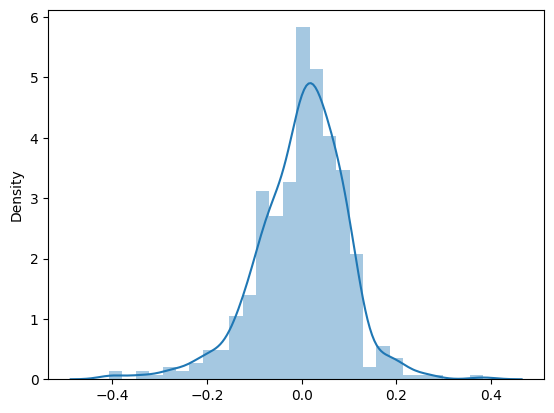

In [79]:
# computing the residuals (error in prediction) 

res = y_train - y_train_pred

# Checking the assumption : if the distribution of residual terms are centered around zero and is approximately normal 
sns.distplot(res)
plt.show()

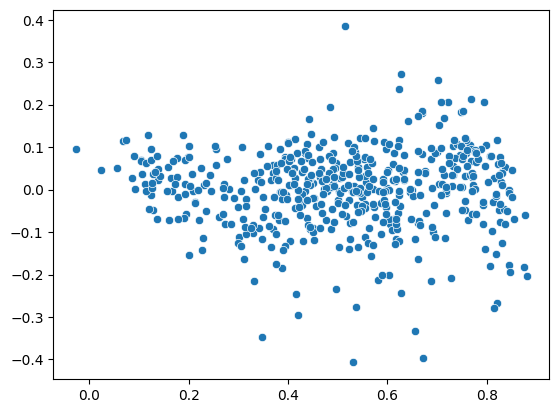

In [80]:
# checking if the residual are randomly distributed. 
sns.scatterplot(x= y_train_pred, y = res)
plt.show()


assumption: the residuals are randomly distributed 

In [81]:
vif = pd.DataFrame()

# assigning the column 'variables' with the columns of X_train 

vif['variables'] = final_data.columns

# assigning the column 'VIF' with the VIF values of the variales 

vif['VIF'] = [variance_inflation_factor(final_data.values,i) for i in range (final_data.shape[1])]

# rounding off the VIF values to 2 decimal places 

vif['VIF'] = round(vif['VIF'],2)

# sorting the VIF values in descending order 

vif = vif.sort_values(by = 'VIF' , ascending = False)
vif


,variables,VIF
0,temp,4.60
1,windspeed,3.81
3,2019,2.03
2,spring,1.51
7,blurry,1.49
4,Jul,1.33
5,Sep,1.20
6,Snow,1.06


Assumption: there is no multicollinearity and all the variables are below 5. 

### Prediction on test set

In [82]:
data_test.shape

(220, 29)

In [83]:
data_test.head()

,temp,hum,windspeed,cnt,spring,summer,winter,2019,Aug,Dec,...,No-Holiday,Mon,Sat,Sun,Thurs,Tue,Wed,Snow,blurry,working_yes
184,29.793347,63.7917,5.459106,6043,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
535,32.082500,59.2083,7.625404,6211,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
299,19.270000,81.2917,13.250121,2659,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,1
221,31.433347,42.4167,13.417286,4780,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
152,29.315000,30.5000,19.583229,4968,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


### Normalization of the test data

In [84]:
#normalization of the test data
data_test[numeric] = scaler.fit_transform(data_test[numeric])
data_test.head(10)


,temp,hum,windspeed,cnt,spring,summer,winter,2019,Aug,Dec,...,No-Holiday,Mon,Sat,Sun,Thurs,Tue,Wed,Snow,blurry,working_yes
184,0.837241,0.534223,0.149393,0.704300,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
535,0.911423,0.470417,0.231142,0.725421,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
299,0.496221,0.777843,0.443398,0.278853,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,1
221,0.890387,0.236659,0.449707,0.545512,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
152,0.821739,0.070765,0.682387,0.569148,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
404,0.223848,0.428654,0.433978,0.426075,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
198,0.863814,0.552784,0.489012,0.505029,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
171,0.776344,0.718678,0.375796,0.552426,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
512,0.818418,0.587587,0.440258,0.704300,0,1,0,1,0,0,...,1,1,0,0,0,0,0,0,0,0
200,0.892600,0.630510,0.231154,0.489188,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [85]:
var = ['temp', 'windspeed', 'spring', '2019', 'Jul', 'Sep',
       'Snow', 'blurry', 'cnt']
pred_df = data_test[var]


In [86]:
final_data.head()

,temp,windspeed,spring,2019,Jul,Sep,Snow,blurry
576,0.815169,0.264686,0,1,1,0,0,0
426,0.442393,0.255342,1,1,0,0,0,1
728,0.245101,0.663106,1,1,0,0,0,0
482,0.395666,0.188475,0,1,0,0,0,1
111,0.345824,0.380981,0,0,0,0,0,1


In [87]:

pred_df.head()

,temp,windspeed,spring,2019,Jul,Sep,Snow,blurry,cnt
184,0.837241,0.149393,0,0,1,0,0,1,0.704300
535,0.911423,0.231142,0,1,0,0,0,0,0.725421
299,0.496221,0.443398,0,0,0,0,0,1,0.278853
221,0.890387,0.449707,0,0,0,0,0,0,0.545512
152,0.821739,0.682387,0,0,0,0,0,0,0.569148


In [88]:
y_test = pred_df.pop('cnt')
x_test = pred_df

### Making predictions of the test set using the linear regression model

In [89]:
x_test_sm = sm.add_constant(x_test)



In [90]:
y_test_pred = linear_regression_model.predict(x_test_sm)


#### Evalutation of the model based on predicted and test data 

/var/folders/_7/q65t_5bs3653ct73dh3s10w00000gn/T/ipykernel_1960/834886408.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test_pred, color = 'green', hist = False)
/var/folders/_7/q65t_5bs3653ct73dh3s10w00000gn/T/ipykernel_1960/834886408.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe575

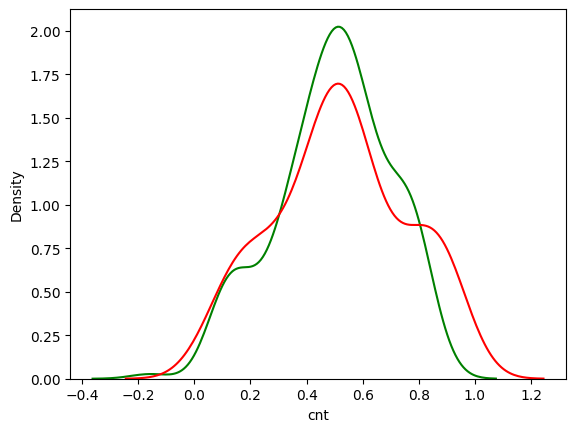

In [91]:
sns.distplot(y_test_pred, color = 'green', hist = False)
sns.distplot(y_test, color = 'red', hist = False)
plt.show()

* The graph of predicted values and the graph of actual values seem to be close to each other 
* Summary : the model is making good predictions based on the distplot 

#### Evalutation of the model based on R squared score

In [92]:
r2_score(y_true = y_test, y_pred = y_test_pred)

0.7873397515614865

* The R squared value obtained in the training dataset : 0.828
* The R sqaured valiue obtained in the test dataset : 0.78
* The differene in values lie with the range of 5 percent.
* Summary : The model is making good predictions based on R squared values 

### Final Model summary

* Increase in temperature increases the demand of bikes 
* Increase in windspeed decreases the demand of bikes
* Demand of bikes decreases in spring 
* Demand of bikes increased in 2019 
* Demand of bikes decreases in July
* Demand of bikes increases in September
* Demand of bikes decreases when there is occurence of snow
* Demand of bikes decreases when there is mist